In [2]:
import db_connection_v2 as db
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

c:\Users\pjcbe\OneDrive - Universidade do Porto\MECD\LAB\Project_weg\LCED\db_connection_v2.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql('SELECT * FROM ListaEBs', self.conn)


In [3]:
def remove_mm_and_convert_to_float(s):
    if s == '':
        return np.nan
    else:
        string_without_mm = re.sub(r' mm', '', s)
        string_with_dot = string_without_mm.replace(',', '.')
        return float(string_with_dot)

def str_commatopoint(s):
    if s == '':
        return np.nan
    else:
        string_with_dot = s.replace(',', '.')
    return float(string_with_dot)

In [4]:
# Create a cursor object
db=db.DBConnection()
df_source = db.get_dataframe()

df=df_source


c:\Users\pjcbe\OneDrive - Universidade do Porto\MECD\LAB\Project_weg\LCED\db_connection_v2.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql('SELECT * FROM ListaEBs', self.conn)


In [5]:
df.columns

Index(['Cod_do_Material', 'Descrição', 'Data_de_criação', 'Componente',
       'Descrição_do_componente', 'Quantidade_do_componente',
       'BITOLA_CABO_ATERRAMEN_CAR CACA', 'BITOLA_CABOS_DE_LIGACAO',
       'BITOLA_FIOS_01_ENROL_01', 'CABOS_LIGACAO_EM_PARALELO',
       'CABOS_PROTECAO_TERMICA', 'CARCACA_PLATAFORMA_ELETRICA',
       'CHOQUE_TERMICO', 'CLASSE_ISOLAMENTO', 'CODIGO_DESENHO_ESTATOR_COMPLET',
       'COD_DESENHO_DISCO_ESTATOR', 'COD_DESENHO_DISCO_ROTOR',
       'COD_MATERIAL_FIO_01_ENROL_01', 'COMPRIMENTO_EXTER_CABO_LIGACAO',
       'DIAMETRO_ANEL_CURTO', 'DIAMETRO_EXTERNO_ESTATOR',
       'DIAMETRO_USINADO_ROTOR', 'ESQUEMA_BOBINAGEM', 'NUMERO_DE_FASES',
       'GRUPO_CARCACA', 'ID_ESTATOR_INSERTADO', 'INCLINACAO_ROTOR',
       'LARGURA_ANEL_CURTO', 'LIGACAO_DOS_CABOS_01', 'MATERIAL_CHAPA',
       'MATERIAL_ISOL_FIO_01_ENROL_01', 'MOTOR_COMPLETO',
       'NIVEL_REND_EFICIENCIA_-_EFF', 'NUMERO_DESENHO',
       'NUMERO_ENROLAMENTOS_MOTOR', 'NR_TOTAL_FIOS_ENROL',
       'COMP

In [6]:
df.describe(include='all')

,Cod_do_Material,Descrição,Data_de_criação,Componente,Descrição_do_componente,Quantidade_do_componente,BITOLA_CABO_ATERRAMEN_CAR CACA,BITOLA_CABOS_DE_LIGACAO,BITOLA_FIOS_01_ENROL_01,CABOS_LIGACAO_EM_PARALELO,...,PROCESSO_FABRICACAO,QTD_CABOS_PROTETOR_TERMICO_01,QUANTIDADE_DE_CABOS_DE_LIGACAO,QTDE_TOTAL_PROTECAO_TERMICA,TERMINAL_LIGACAO,TIPO_ESTATOR_BOBINADO,TIPO_DE_IMPREGNACAO,TIPO_LIGACAO_PROTECAO_TERMICA,USO_DO_TERMINAL,Custo_Industrial
count,9.290000e+03,9290,9290,9.290000e+03,9290,9290.000000,9290,9290,9290,9290,...,9290,9290.000000,9290.000000,9290.000000,9290,9290,9290,9290,9290,9290.000000
unique,NaN,1022,693,NaN,23,NaN,11,11,5,3,...,1,NaN,NaN,NaN,2,3,5,3,2,NaN
top,NaN,ESTATOR BOB F 100CV 4P 280S/M,21/10/2021,NaN,"FIO CIRCULAR Cu ESMALTE GR2 200 1,32mm",NaN,35 mm2,6 mm2,"1,320",NAO,...,MANUAL,NaN,NaN,NaN,COM TERMINAL,DE LINHA ESPECIAL,RESINA POLIESTER LACTHERM,SERIE,COM TERMINAL,NaN
freq,NaN,253,60,NaN,6992,NaN,3762,1422,9068,9133,...,9290,NaN,NaN,NaN,8766,5652,9171,7977,8767,NaN
mean,1.691380e+07,NaN,NaN,1.286091e+07,NaN,52.642444,NaN,NaN,NaN,NaN,...,NaN,3.581055,5.967061,1.156082,NaN,NaN,NaN,NaN,NaN,0.156356
std,5.139637e+05,NaN,NaN,2.735930e+05,NaN,44.232805,NaN,NaN,NaN,NaN,...,NaN,4.157382,0.358812,0.447921,NaN,NaN,NaN,NaN,NaN,0.102432
min,1.609738e+07,NaN,NaN,1.001498e+07,NaN,1.000000,NaN,NaN,NaN,NaN,...,NaN,0.000000,3.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.037980
25%,1.644279e+07,NaN,NaN,1.285774e+07,NaN,21.959000,NaN,NaN,NaN,NaN,...,NaN,2.000000,6.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.085060
50%,1.691327e+07,NaN,NaN,1.285774e+07,NaN,42.981000,NaN,NaN,NaN,NaN,...,NaN,2.000000,6.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.131720
75%,1.735368e+07,NaN,NaN,1.285774e+07,NaN,69.581000,NaN,NaN,NaN,NaN,...,NaN,2.000000,6.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.192433


## Data Preparation

In [8]:
df['COMPRIMENTO_TOTAL_PACOTE'].value_counts()

COMPRIMENTO_TOTAL_PACOTE
300,00 mm      754
240,00 mm      613
260,00 mm      563
200,00 mm      453
220,00 mm      434
              ... 
680,00 mm        1
870,00 mm        1
860,00 mm        1
1.010,00 mm      1
900,00 mm        1
Name: count, Length: 79, dtype: int64

In [9]:
df['NUMERO_ENROLAMENTOS_MOTOR'].apply(lambda x: remove_mm_and_convert_to_float(x))

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
9285    1.0
9286    1.0
9287    1.0
9288    1.0
9289    1.0
Name: NUMERO_ENROLAMENTOS_MOTOR, Length: 9290, dtype: float64

In [10]:
df['NUMERO_ENROLAMENTOS_MOTOR']=df['NUMERO_ENROLAMENTOS_MOTOR'].astype('Int64')

In [11]:

for col in ['DIAMETRO_ANEL_CURTO','DIAMETRO_EXTERNO_ESTATOR','DIAMETRO_USINADO_ROTOR','LARGURA_ANEL_CURTO','BITOLA_CABO_ATERRAMEN_CAR CACA','BITOLA_CABOS_DE_LIGACAO','BITOLA_CABO_ATERRAMEN_CAR CACA','BITOLA_FIOS_01_ENROL_01','INCLINACAO_ROTOR']:
    try:
     df[col]=df[col].apply(lambda x: remove_mm_and_convert_to_float(x))
    except:
       print(f"Column {col} was not changed.")
    
    try:
        df[col]=df[col].apply(lambda x: str_commatopoint(x))
    except:
        print(f"Column {col} was not changed.")


Column DIAMETRO_ANEL_CURTO was not changed.
Column DIAMETRO_EXTERNO_ESTATOR was not changed.
Column DIAMETRO_USINADO_ROTOR was not changed.
Column LARGURA_ANEL_CURTO was not changed.
Column BITOLA_CABO_ATERRAMEN_CAR CACA was not changed.
Column BITOLA_CABOS_DE_LIGACAO was not changed.
Column BITOLA_CABO_ATERRAMEN_CAR CACA was not changed.
Column BITOLA_CABO_ATERRAMEN_CAR CACA was not changed.
Column BITOLA_FIOS_01_ENROL_01 was not changed.
Column INCLINACAO_ROTOR was not changed.


In [20]:
codes_cols=['Cod_do_Material', 'Componente','CODIGO_DESENHO_ESTATOR_COMPLET','COD_DESENHO_DISCO_ESTATOR', 'COD_MATERIAL_FIO_01_ENROL_01']

df[codes_cols].astype('string')

,Cod_do_Material,Componente,CODIGO_DESENHO_ESTATOR_COMPLET,COD_DESENHO_DISCO_ESTATOR,COD_MATERIAL_FIO_01_ENROL_01
0,16097382,12857737,10000162702.0,10000386720.0,12857737.0
1,16097384,12857737,10000072844.0,10000015438.0,12857737.0
2,16097553,12857737,10000162702.0,10000386720.0,12857737.0
3,16097555,12857737,10000162702.0,10000386720.0,12857737.0
4,16097557,12857737,10000246005.0,10000612308.0,12857737.0
...,...,...,...,...,...
9285,17812336,12857737,10008501886.0,10000103791.0,12857737.0
9286,17812359,12936494,10000246302.0,10001361827.0,12936494.0
9287,17812514,12857737,10000399772.0,10000386720.0,12857737.0
9288,17813074,10974966,10000072844.0,10000015359.0,10974966.0


In [21]:
df.dtypes

Cod_do_Material                     int64
Descrição                          object
Data_de_criação                    object
Componente                          int64
Descrição_do_componente            object
Quantidade_do_componente          float64
BITOLA_CABO_ATERRAMEN_CAR CACA    float64
BITOLA_CABOS_DE_LIGACAO           float64
BITOLA_FIOS_01_ENROL_01           float64
CABOS_LIGACAO_EM_PARALELO          object
CABOS_PROTECAO_TERMICA             object
CARCACA_PLATAFORMA_ELETRICA        object
CHOQUE_TERMICO                     object
CLASSE_ISOLAMENTO                  object
CODIGO_DESENHO_ESTATOR_COMPLET    float64
COD_DESENHO_DISCO_ESTATOR         float64
COD_DESENHO_DISCO_ROTOR            object
COD_MATERIAL_FIO_01_ENROL_01      float64
COMPRIMENTO_EXTER_CABO_LIGACAO    float64
DIAMETRO_ANEL_CURTO               float64
DIAMETRO_EXTERNO_ESTATOR          float64
DIAMETRO_USINADO_ROTOR            float64
ESQUEMA_BOBINAGEM                  object
NUMERO_DE_FASES                   

In [29]:
num_cols=df.select_dtypes(exclude=['object']).columns
num_cols

Index(['Cod_do_Material', 'Componente', 'Quantidade_do_componente',
       'BITOLA_CABO_ATERRAMEN_CAR CACA', 'BITOLA_CABOS_DE_LIGACAO',
       'BITOLA_FIOS_01_ENROL_01', 'CODIGO_DESENHO_ESTATOR_COMPLET',
       'COD_DESENHO_DISCO_ESTATOR', 'COD_MATERIAL_FIO_01_ENROL_01',
       'COMPRIMENTO_EXTER_CABO_LIGACAO', 'DIAMETRO_ANEL_CURTO',
       'DIAMETRO_EXTERNO_ESTATOR', 'DIAMETRO_USINADO_ROTOR',
       'INCLINACAO_ROTOR', 'LARGURA_ANEL_CURTO', 'NUMERO_ENROLAMENTOS_MOTOR',
       'NR_TOTAL_FIOS_ENROL', 'QTD_CABOS_PROTETOR_TERMICO_01',
       'QUANTIDADE_DE_CABOS_DE_LIGACAO', 'QTDE_TOTAL_PROTECAO_TERMICA',
       'Custo_Industrial'],
      dtype='object')

In [30]:
cat_cols=df.select_dtypes(exclude=['number']).columns
cat_cols

Index(['Descrição', 'Data_de_criação', 'Descrição_do_componente',
       'CABOS_LIGACAO_EM_PARALELO', 'CABOS_PROTECAO_TERMICA',
       'CARCACA_PLATAFORMA_ELETRICA', 'CHOQUE_TERMICO', 'CLASSE_ISOLAMENTO',
       'COD_DESENHO_DISCO_ROTOR', 'ESQUEMA_BOBINAGEM', 'NUMERO_DE_FASES',
       'GRUPO_CARCACA', 'ID_ESTATOR_INSERTADO', 'LIGACAO_DOS_CABOS_01',
       'MATERIAL_CHAPA', 'MATERIAL_ISOL_FIO_01_ENROL_01', 'MOTOR_COMPLETO',
       'NIVEL_REND_EFICIENCIA_-_EFF', 'NUMERO_DESENHO',
       'COMPRIMENTO_TOTAL_PACOTE', 'PASSO_ENROLAMENTO_01', 'POLARIDADE_CHAPA',
       'POLARIDADE_COMPLETA', 'POTENCIA_COMPLETA_CV_01', 'PROCESSO_FABRICACAO',
       'TERMINAL_LIGACAO', 'TIPO_ESTATOR_BOBINADO', 'TIPO_DE_IMPREGNACAO',
       'TIPO_LIGACAO_PROTECAO_TERMICA', 'USO_DO_TERMINAL'],
      dtype='object')

## Numeric features

#### Univariate Analysis

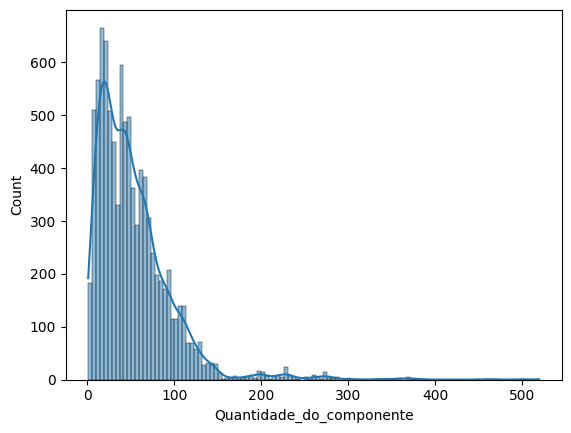

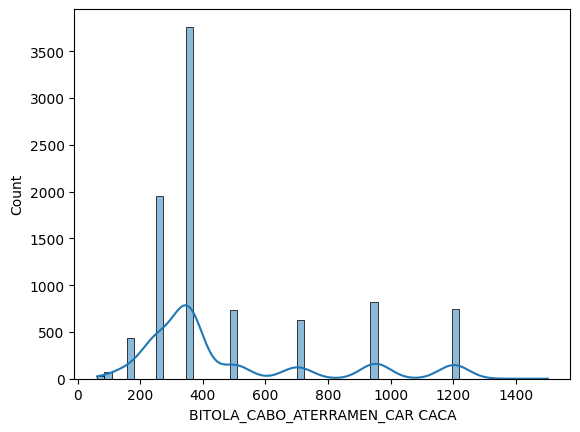

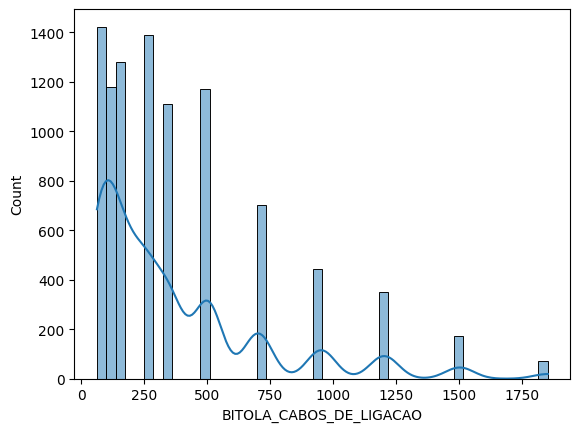

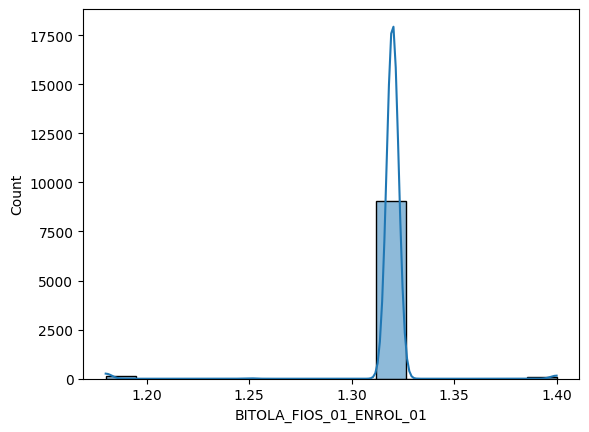

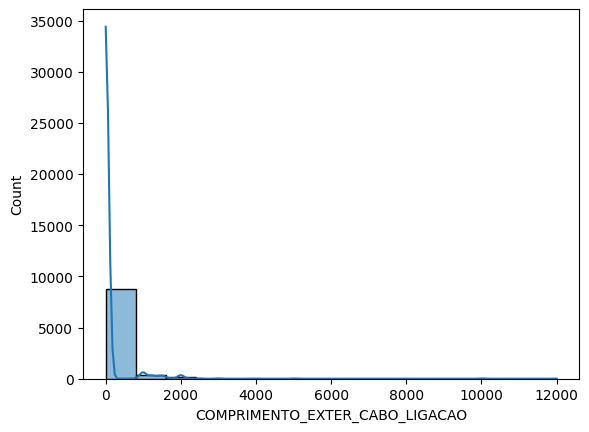

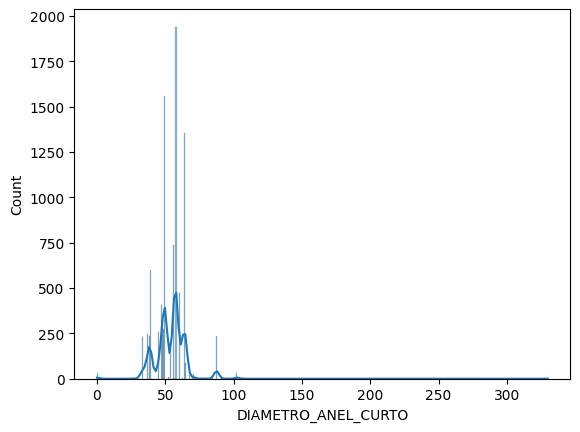

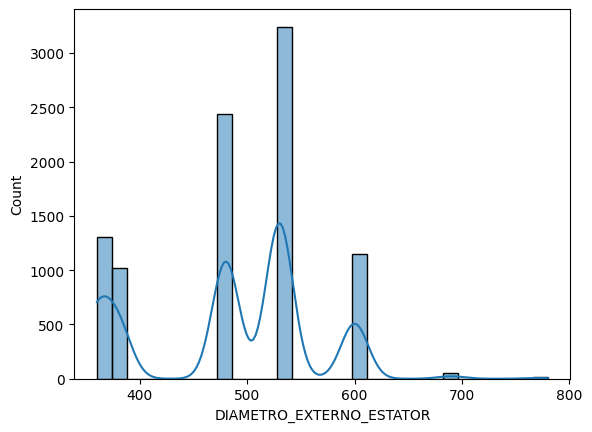

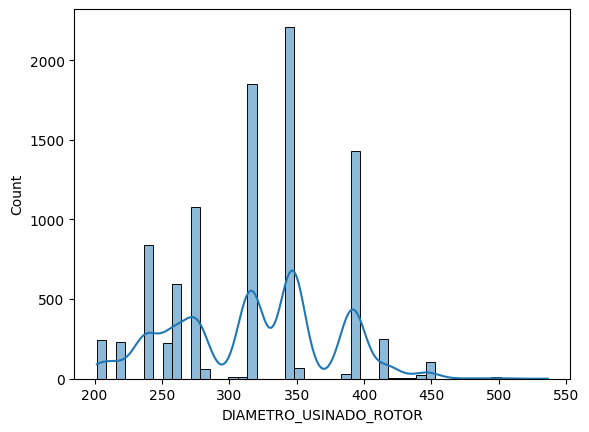

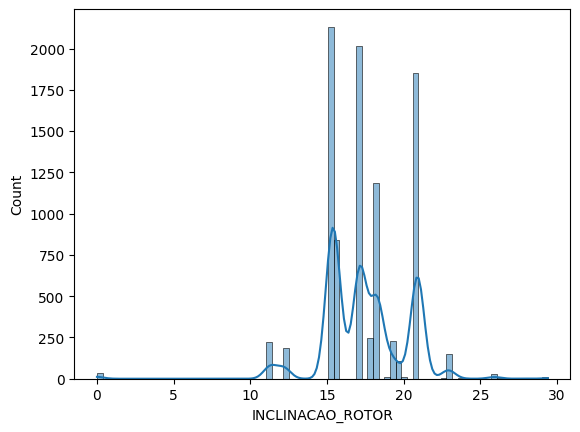

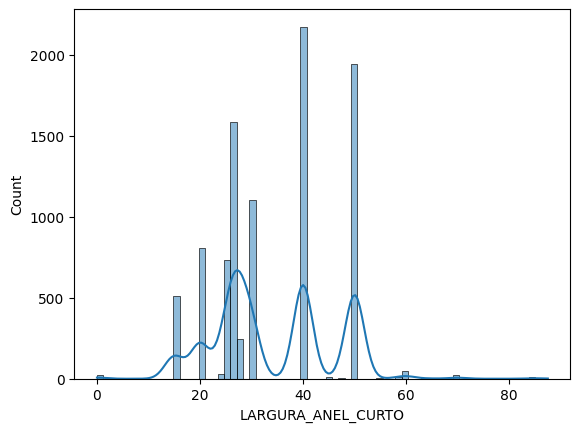

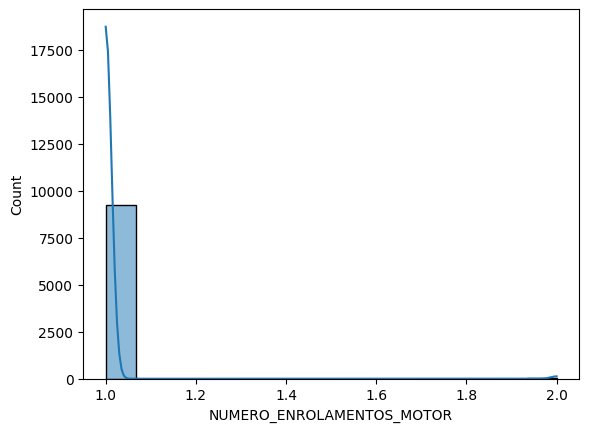

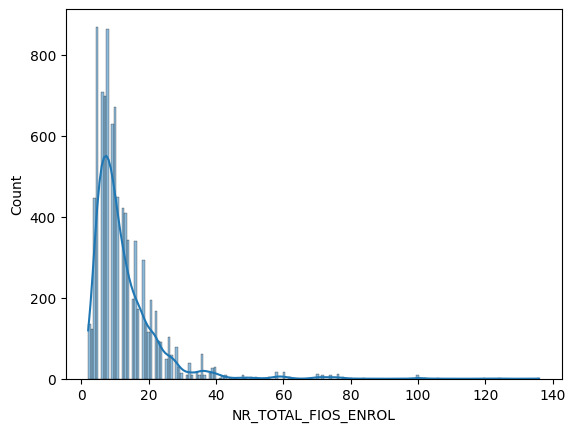

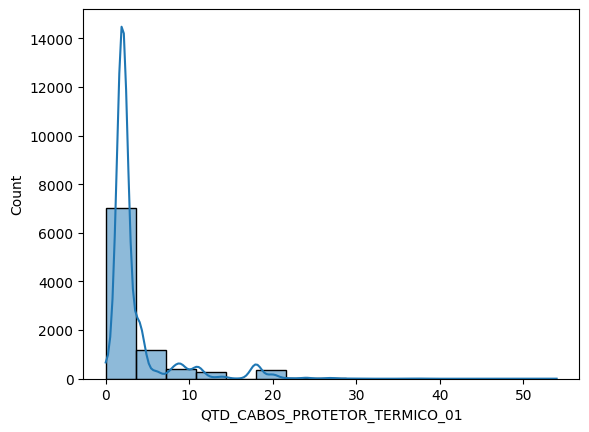

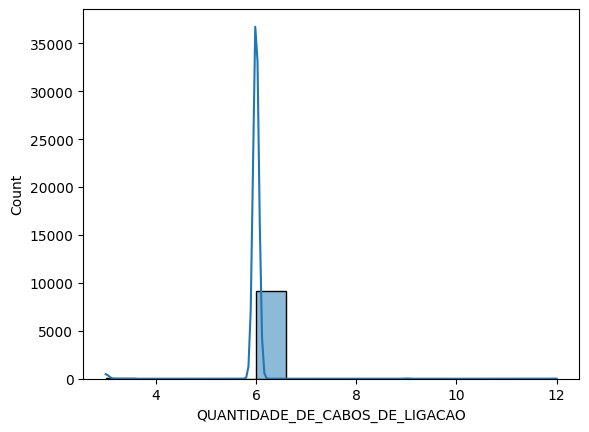

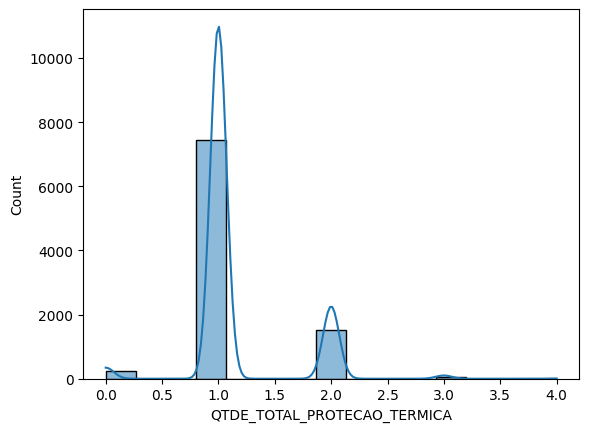

In [13]:
for col in num_cols:
    sns.histplot(df[col], kde=True)
    plt.show()

### Bivariate Analysis


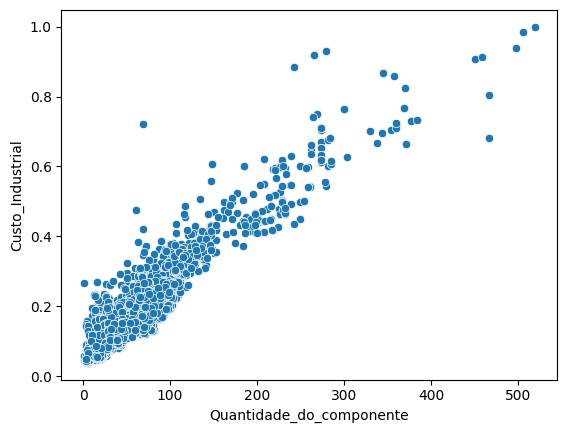

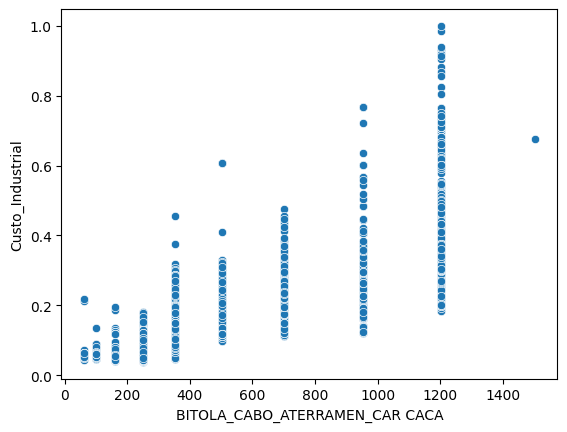

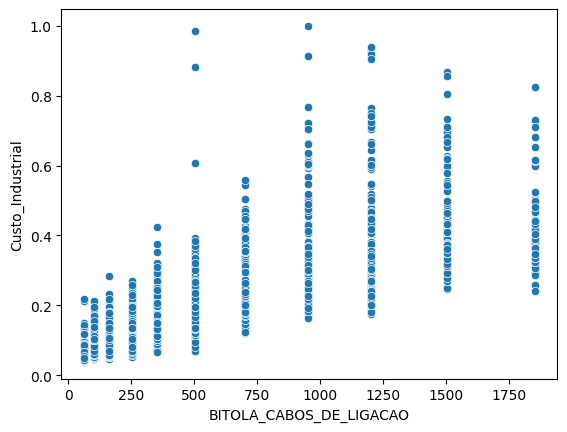

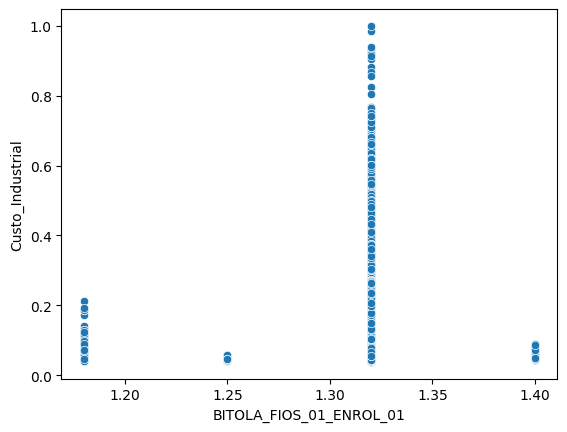

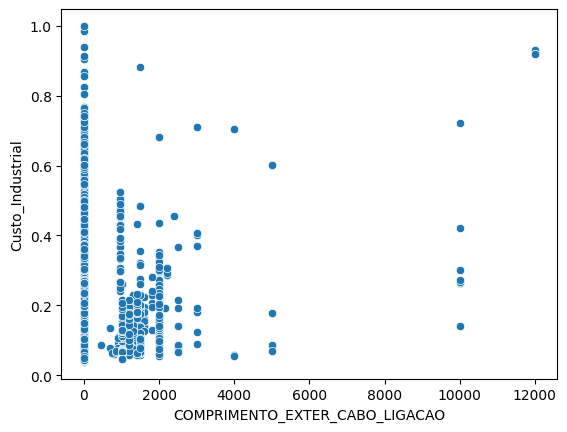

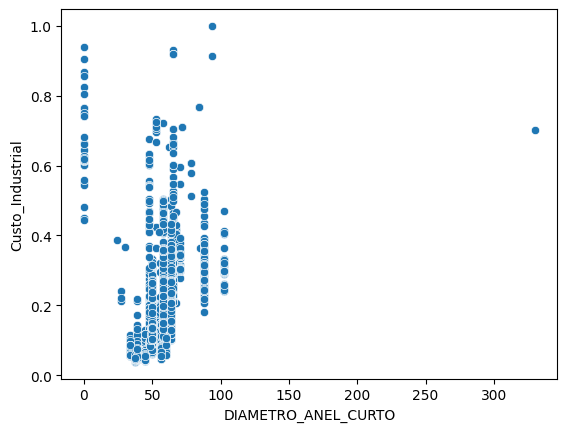

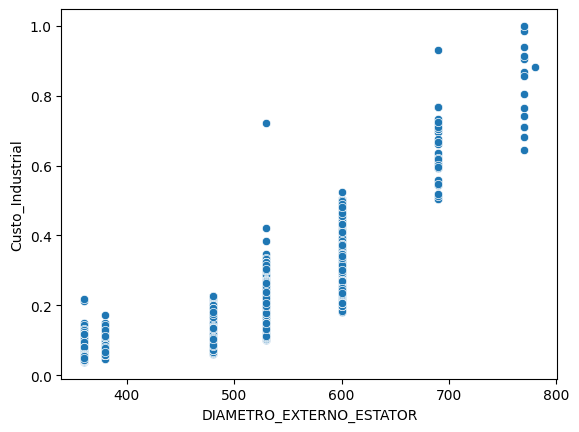

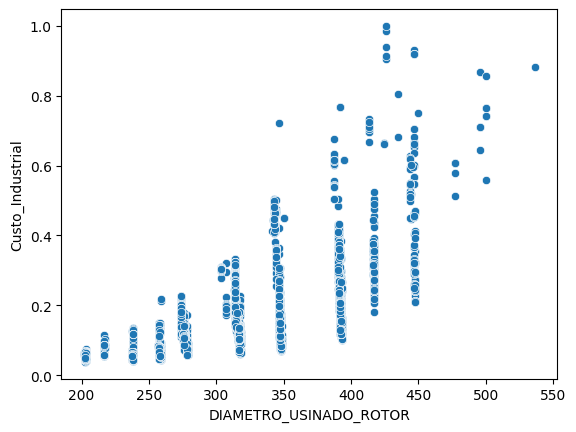

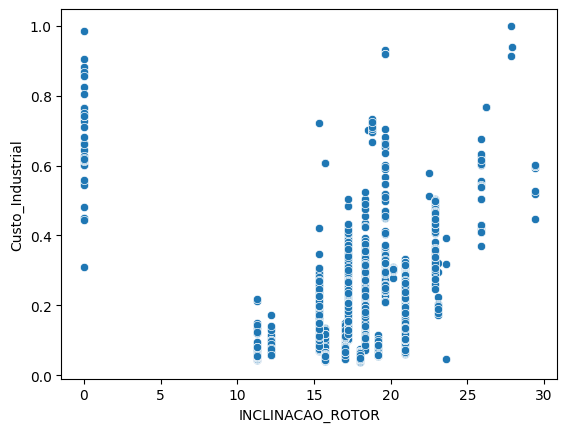

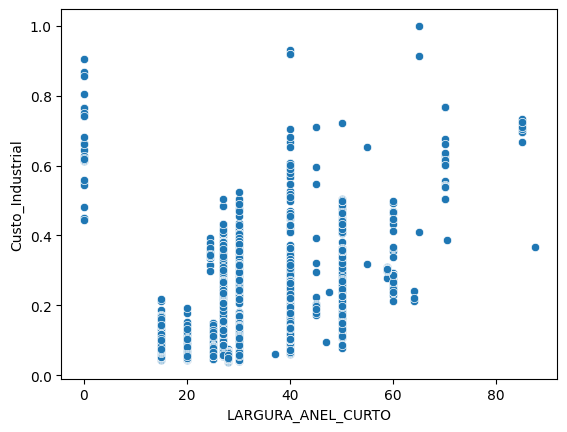

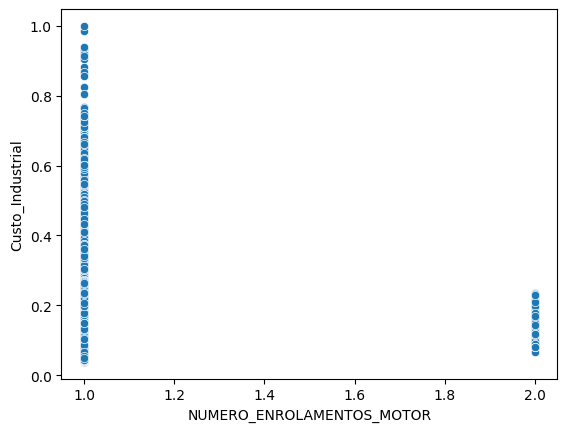

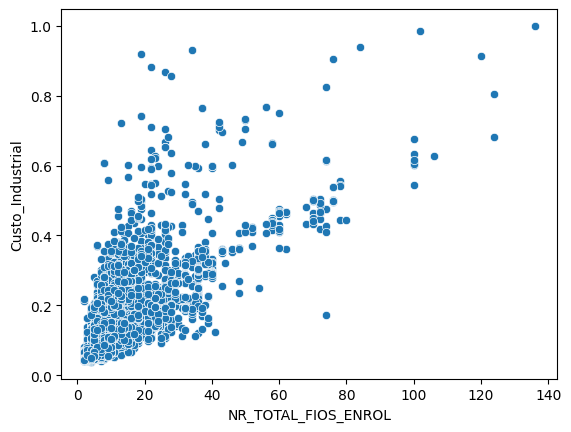

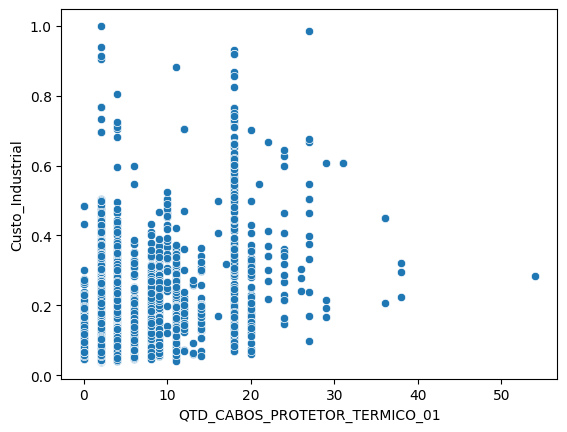

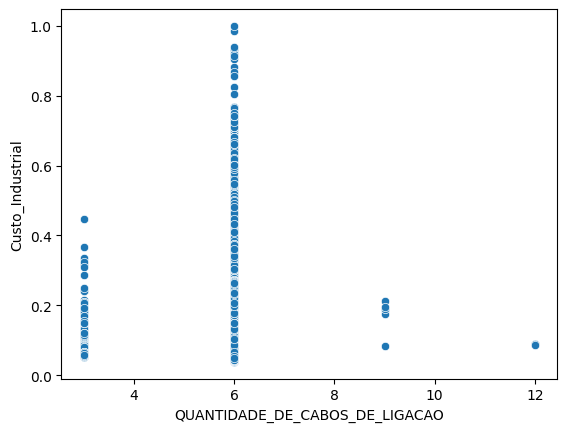

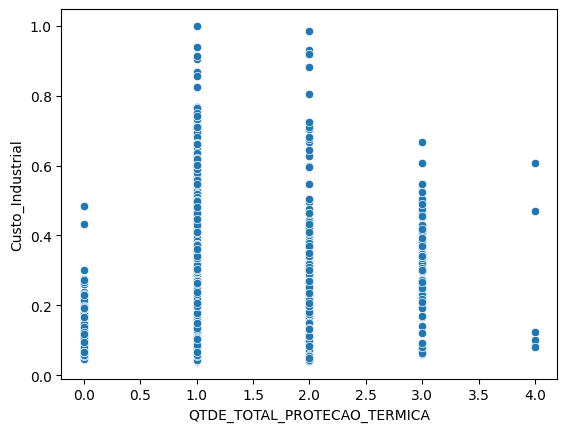

In [14]:
for col in num_cols:
    sns.scatterplot(x=col, y='Custo_Industrial', data=df)
    #sns.regplot(x=col, y='Custo_Industrial', data=df)
    plt.show()

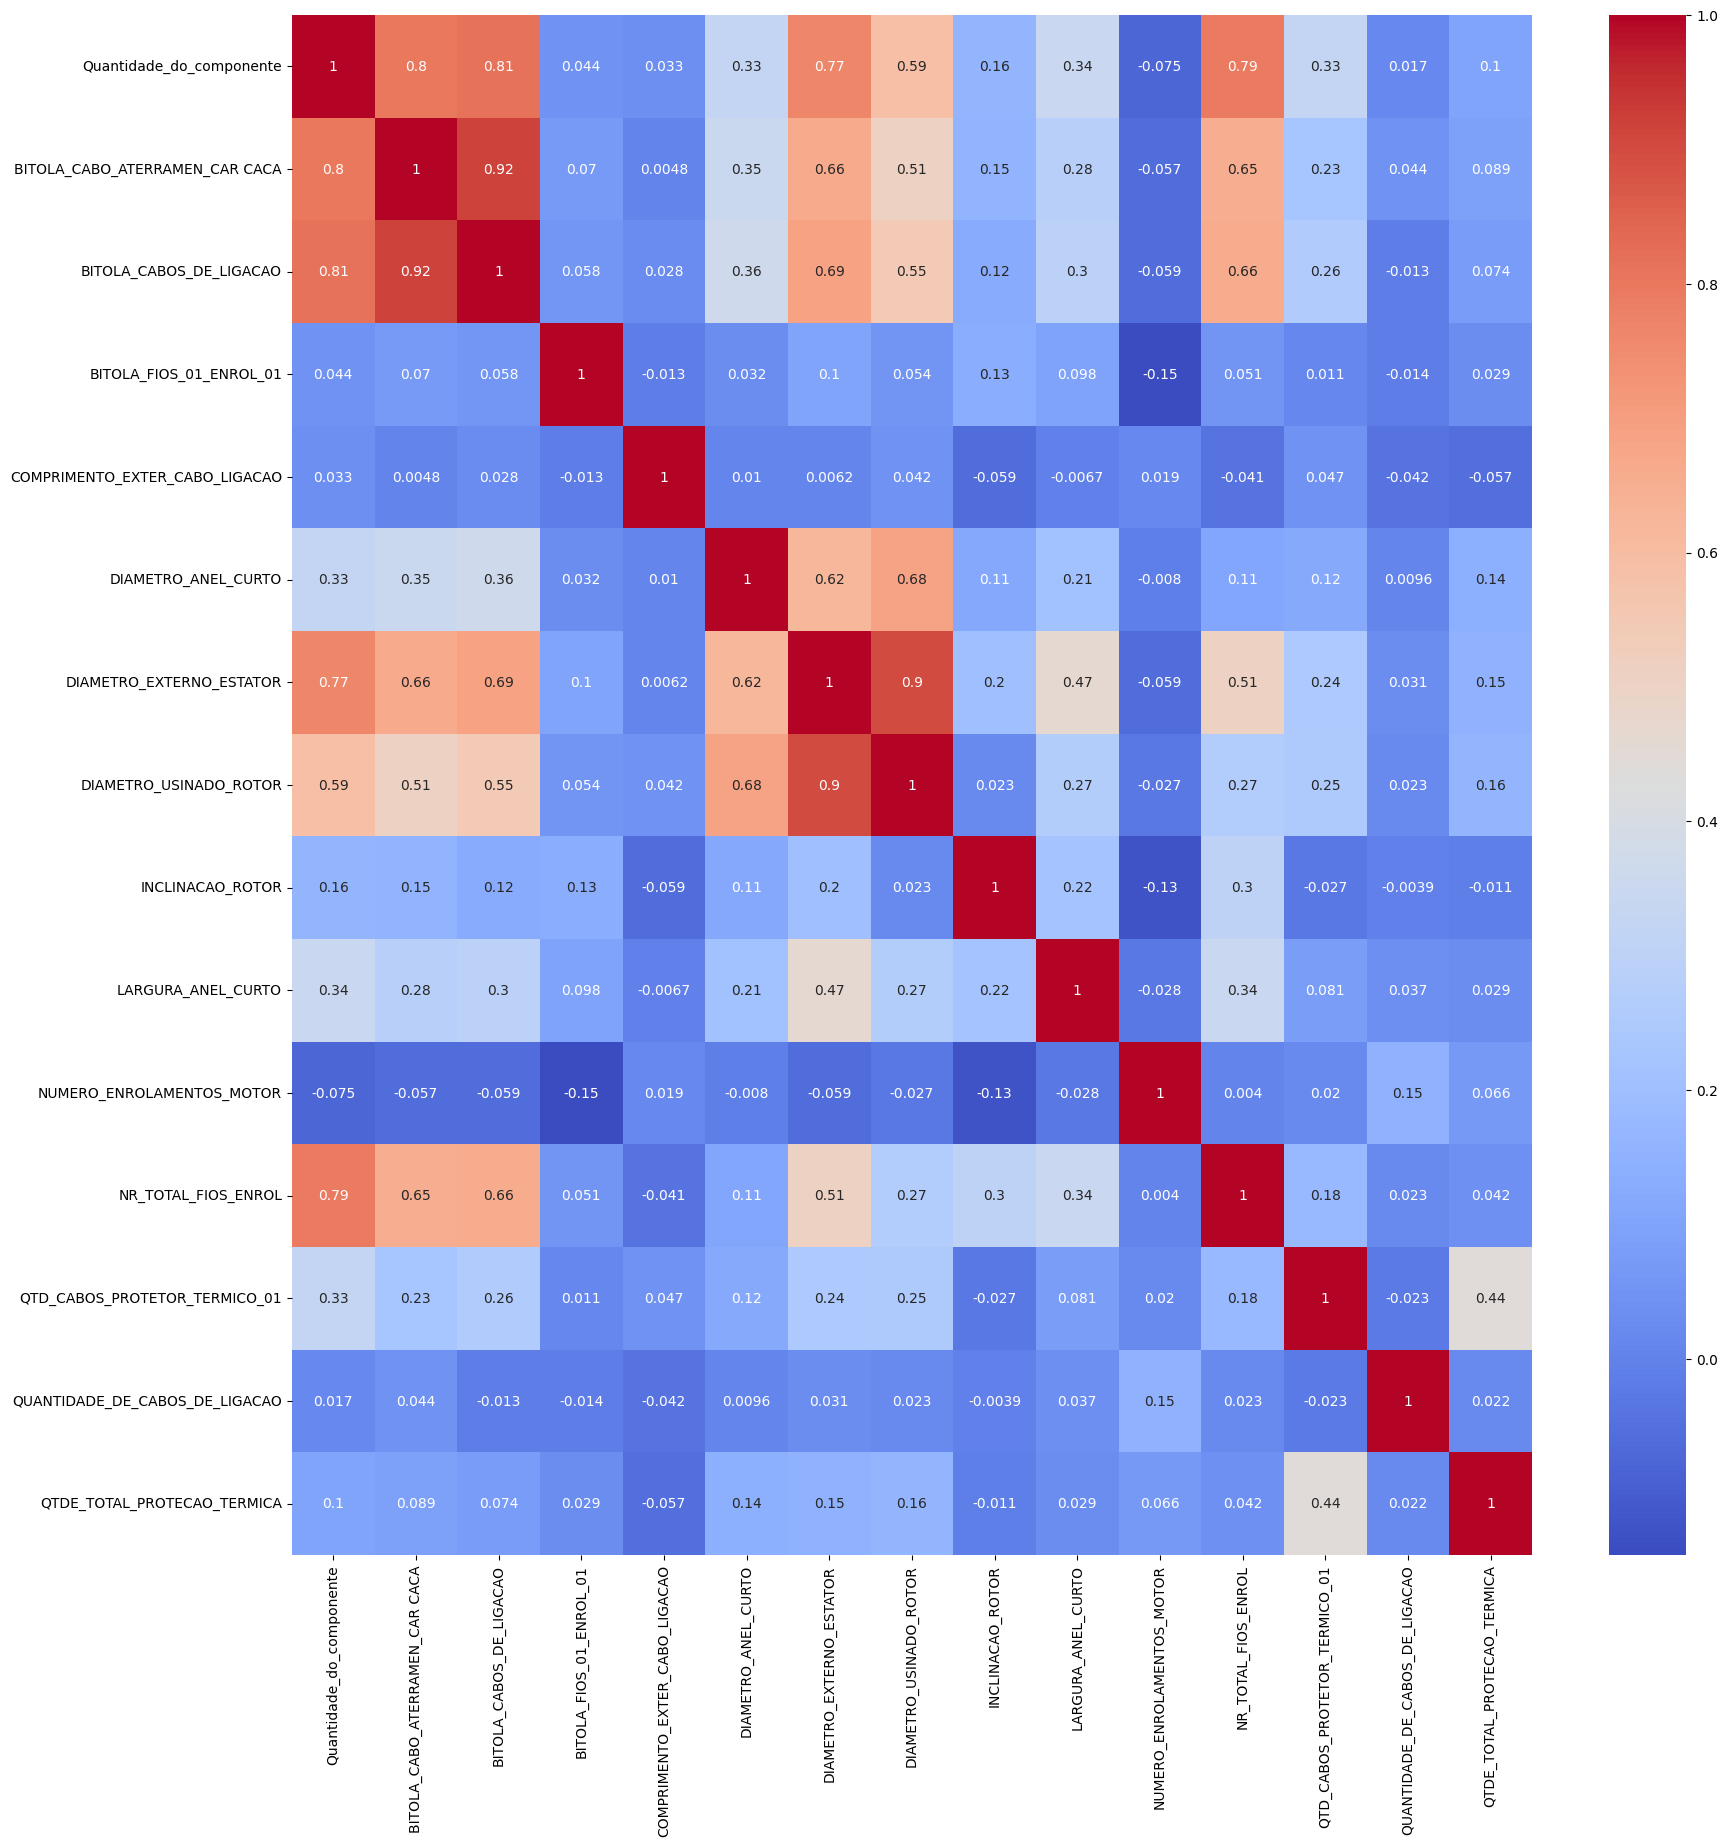

In [15]:
corr_matrix = df[num_cols].corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


### Multivariate Analysis

<Figure size 5000x5000 with 0 Axes>

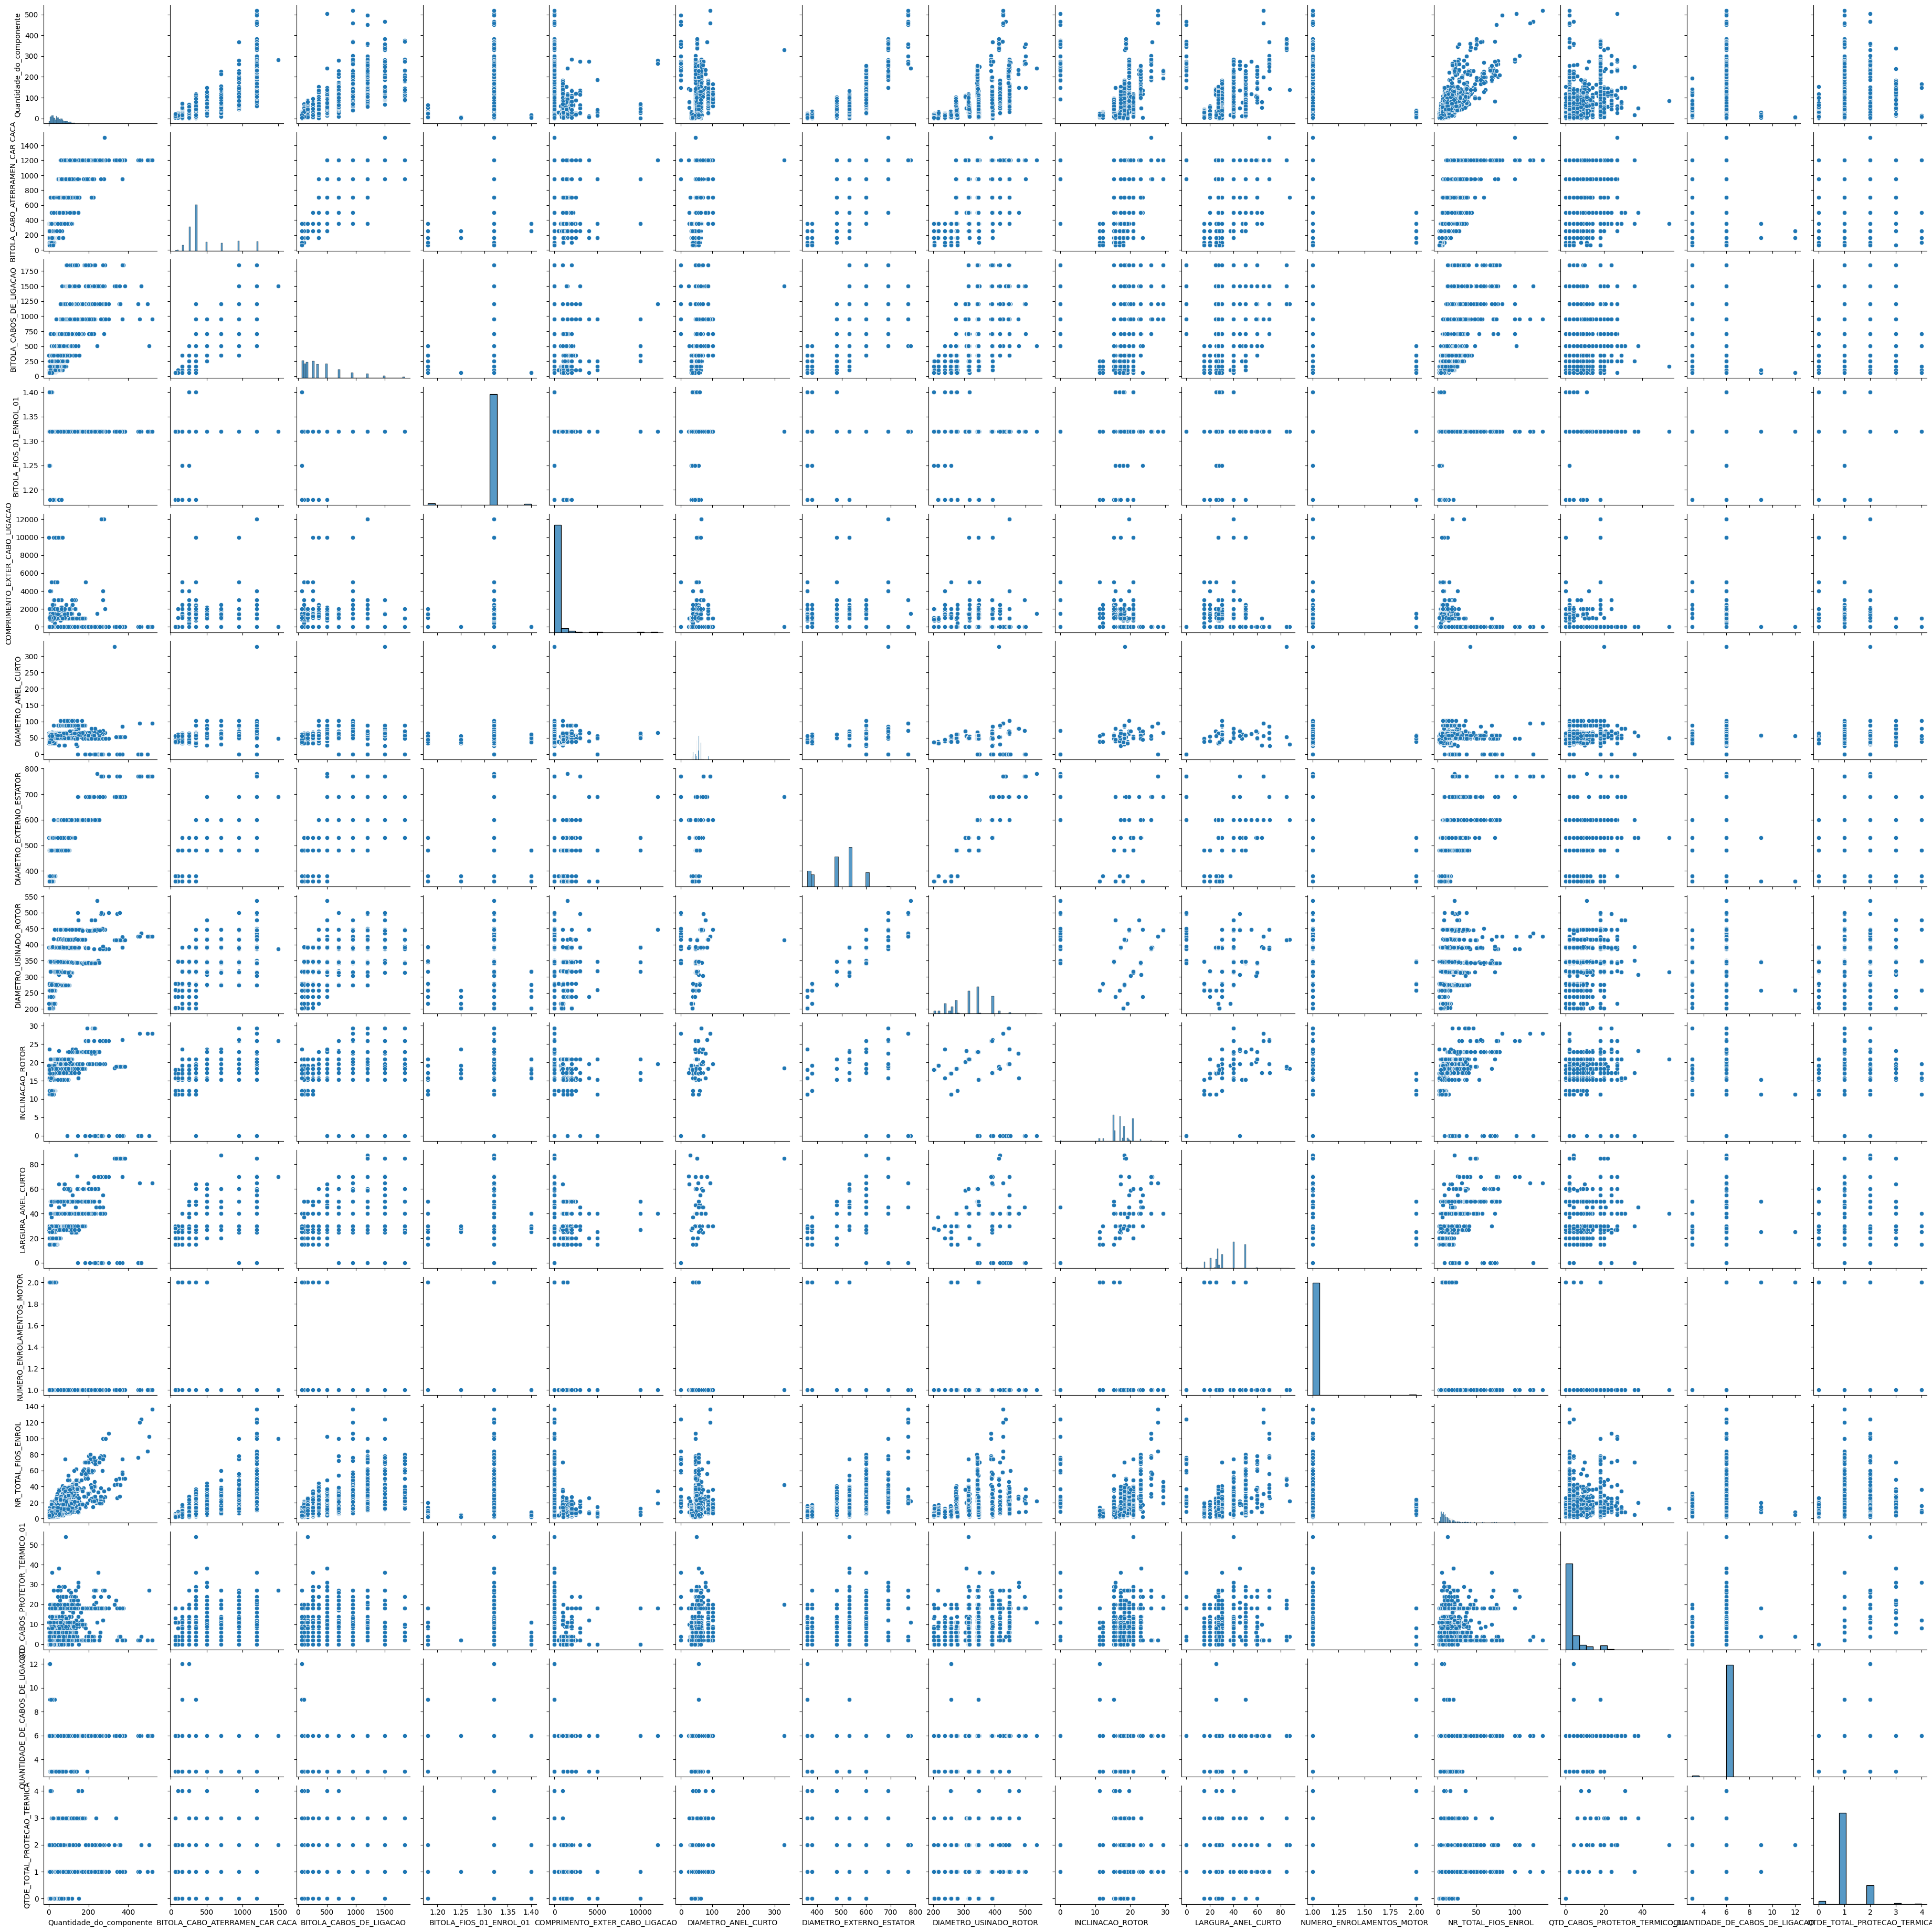

In [17]:
# Pair plot
plt.figure(figsize=(50, 50))
sns.pairplot(df[num_cols])
plt.show()


## Categoric Variables

### Univariate Analysis


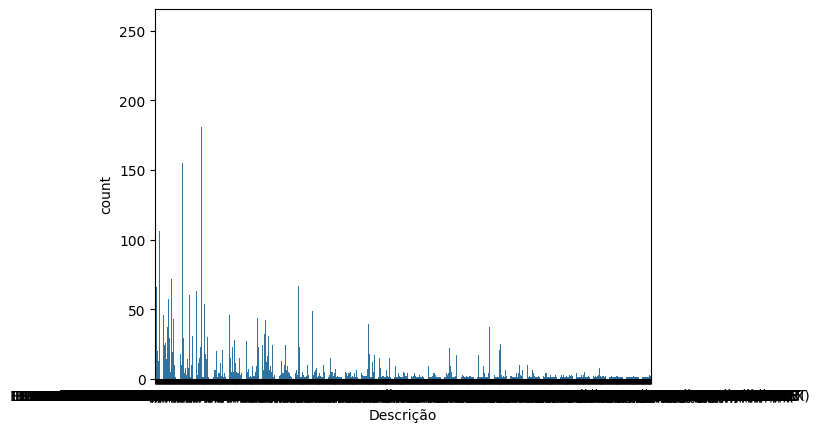

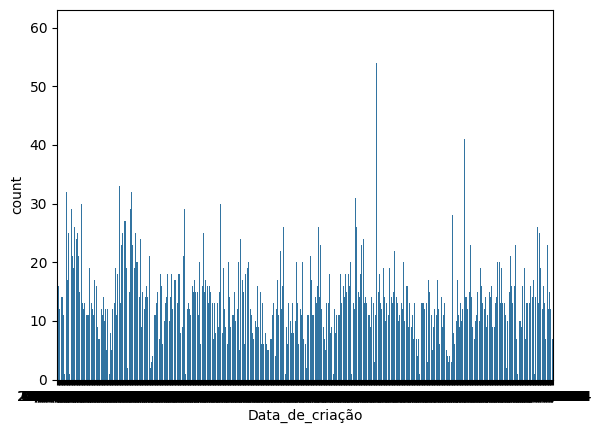

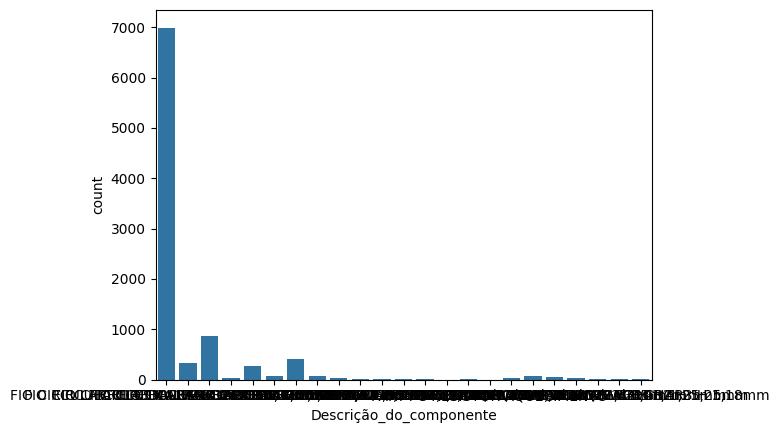

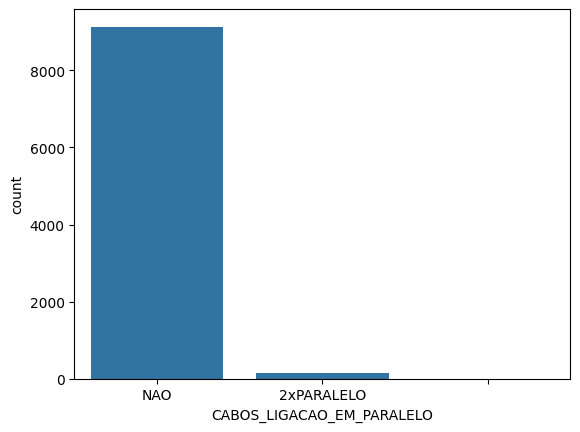

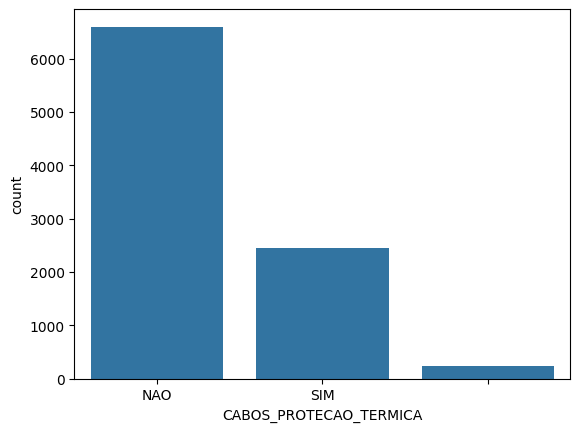

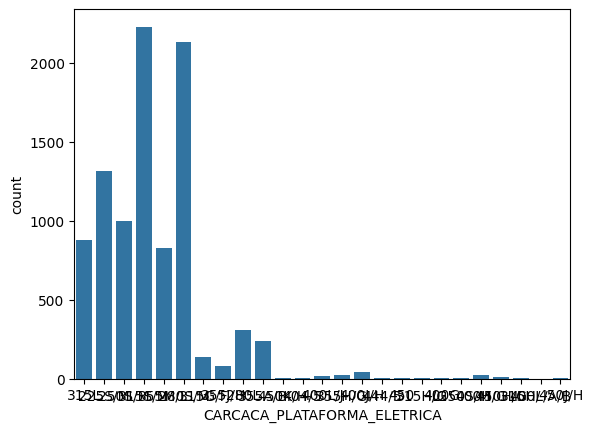

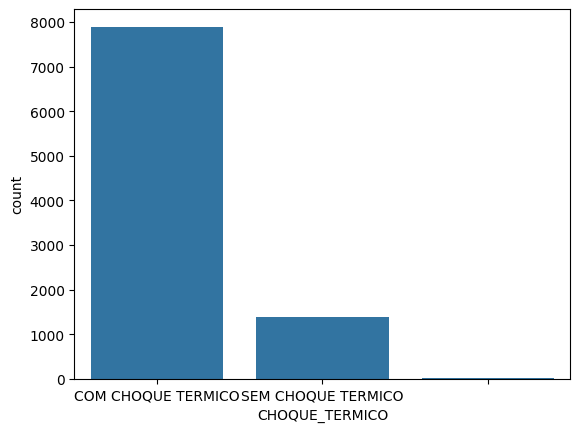

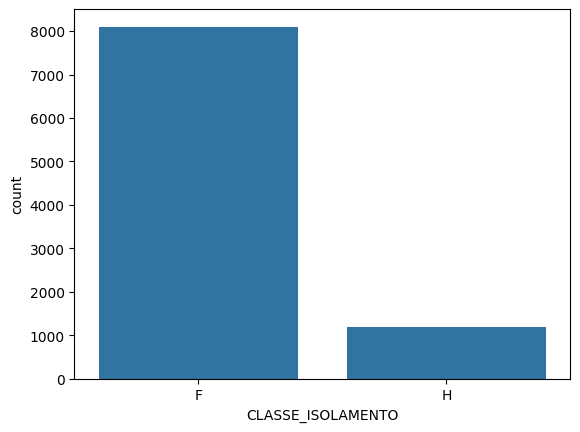

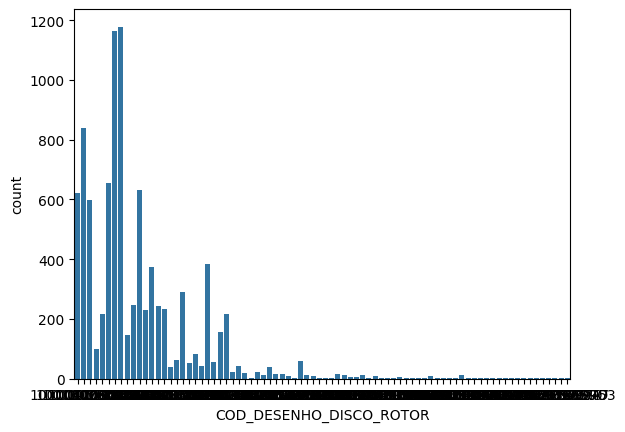

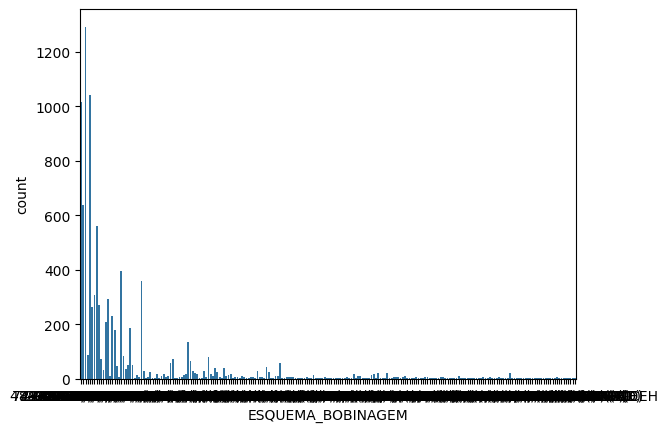

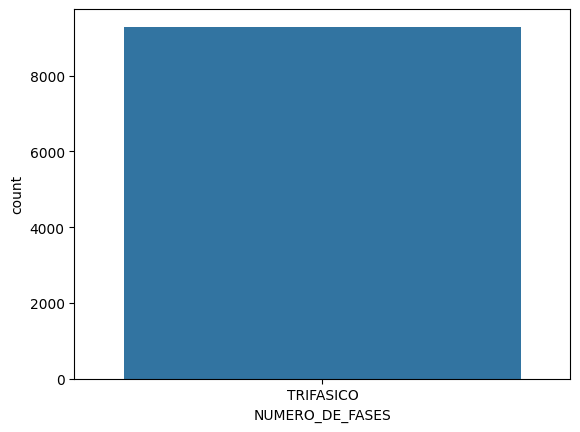

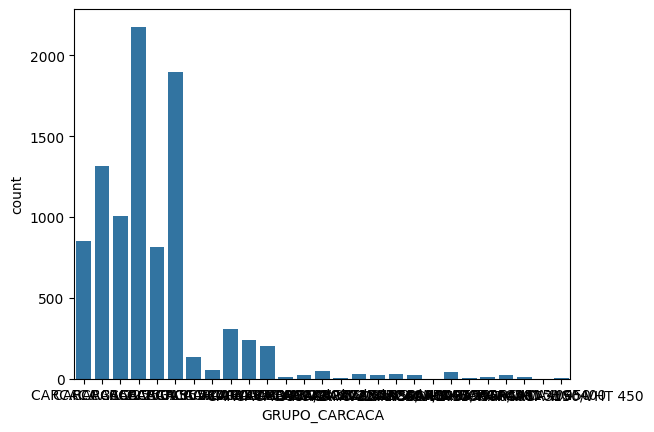

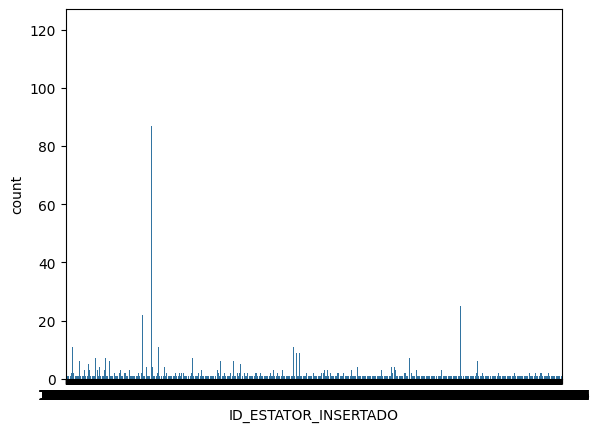

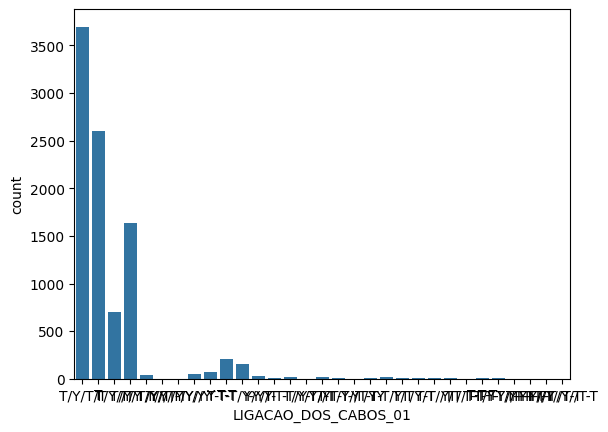

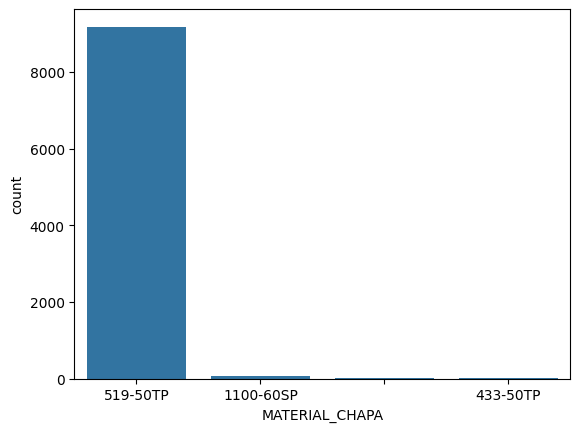

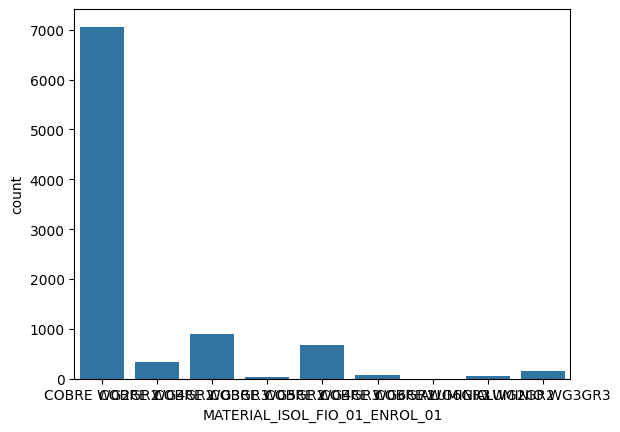

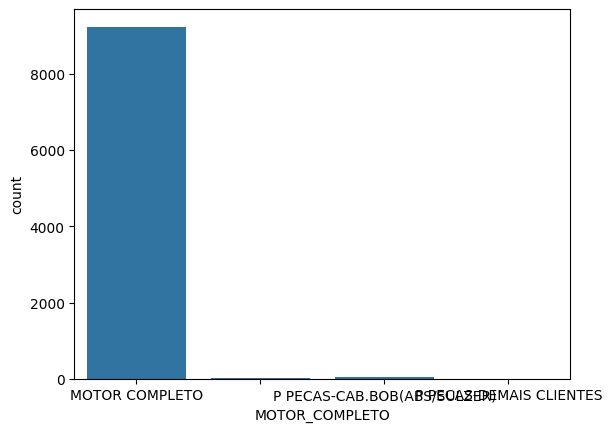

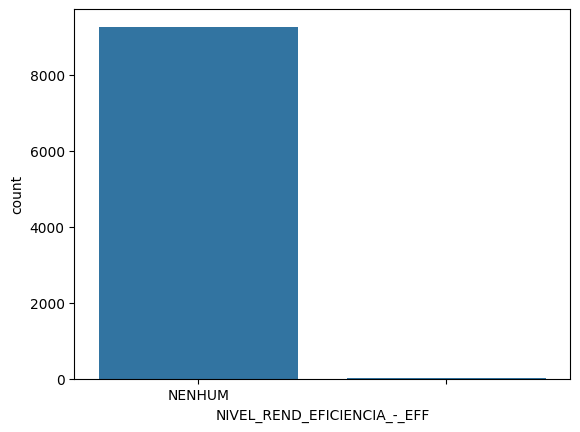

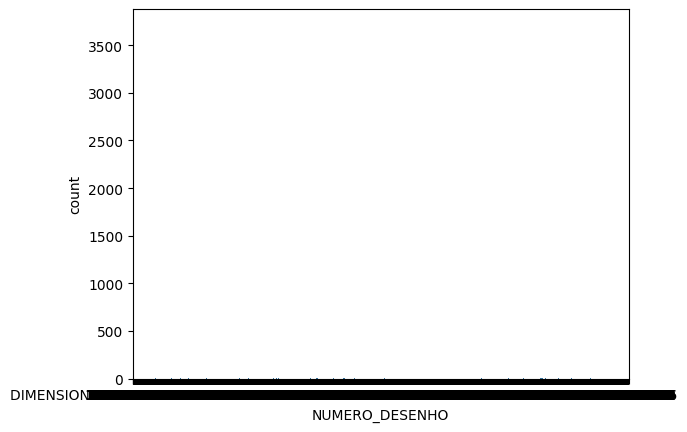

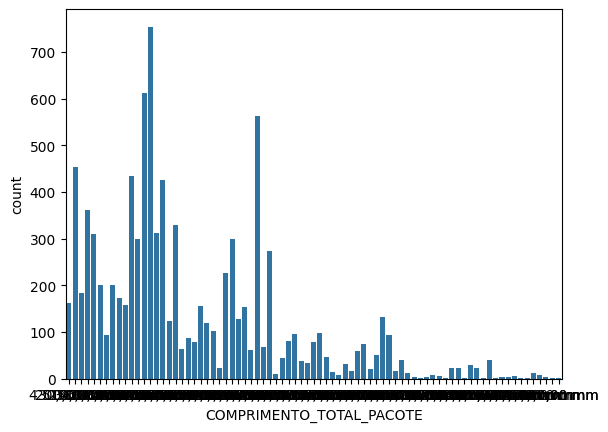

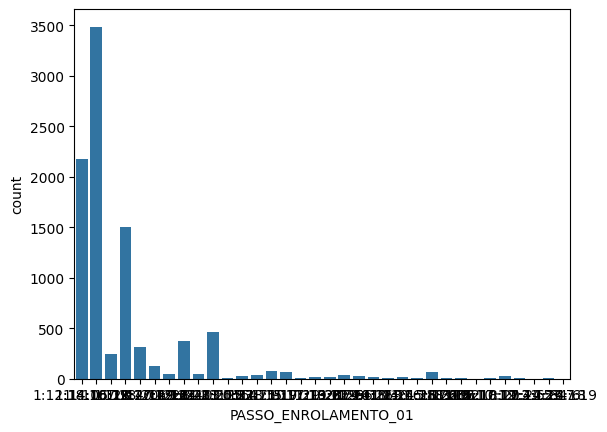

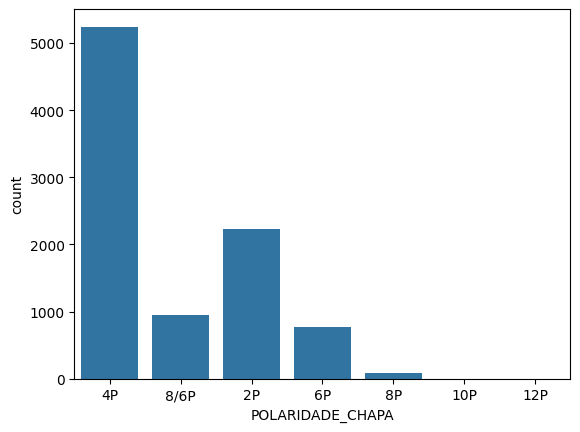

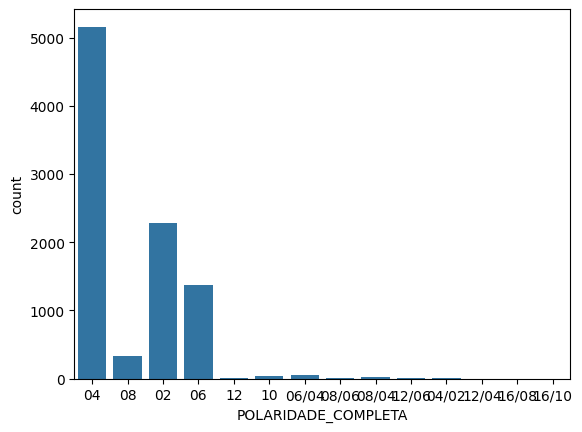

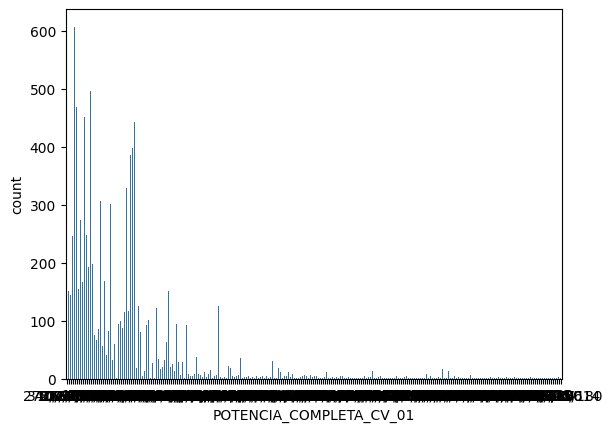

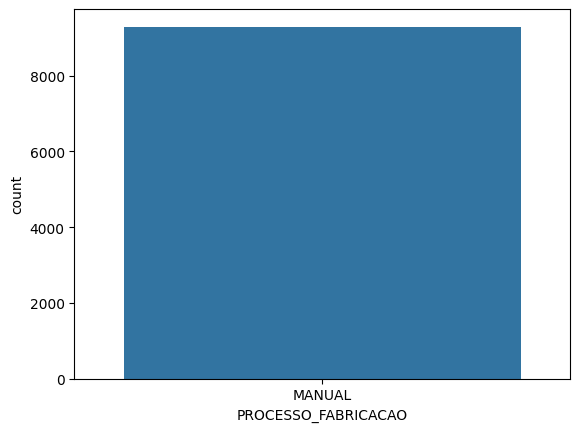

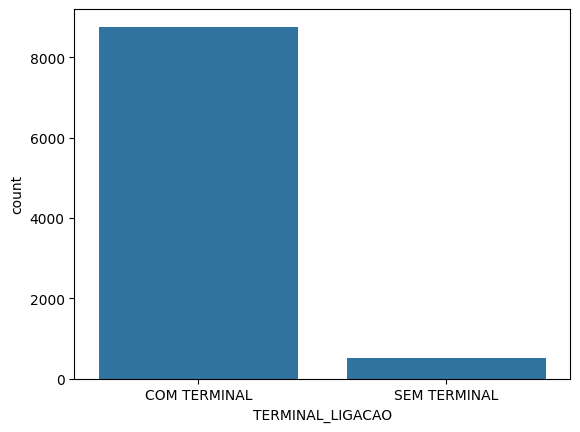

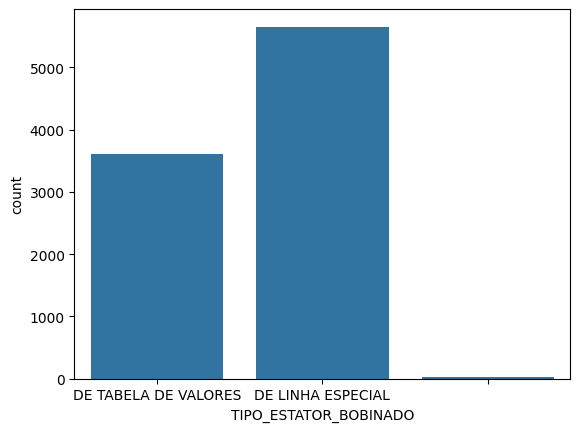

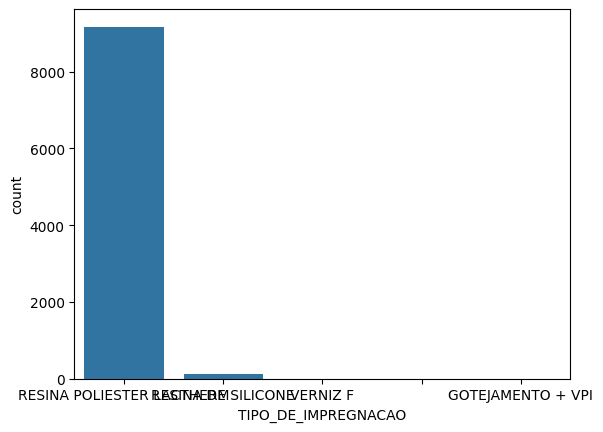

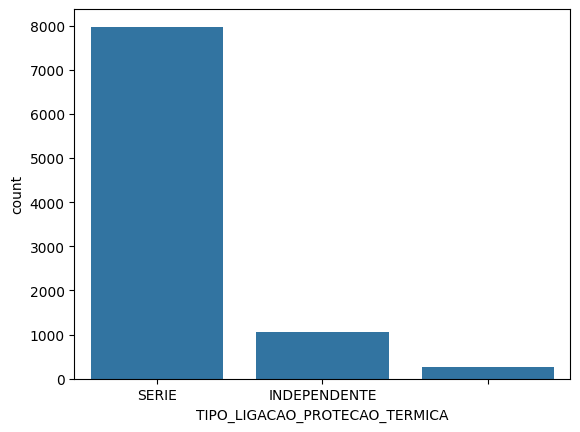

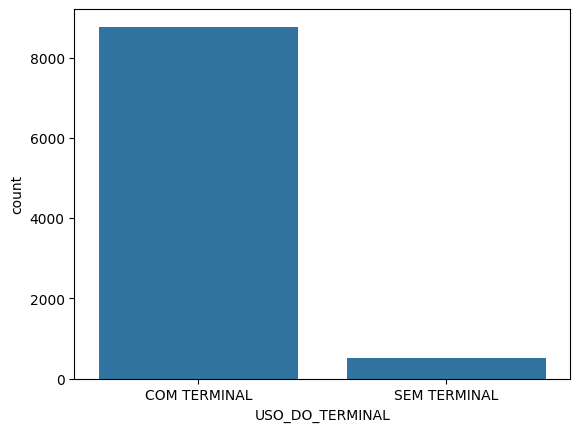

In [36]:
for col in cat_cols:
    sns.countplot(x=col, data=df)
    plt.show()